In [2]:
import numpy as np
import pandas as pd
import os
import scipy
import scipy.io

import sys

import pystan
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

np.random.seed(1234)
%matplotlib inline

In [3]:
patient = 'la01_ictal'
resultsdir = os.path.join('/Volumes/ADAM LI/pydata/output/pert/', patient)
filename = patient + '_pertmodel.npz'
filetoload = os.path.join(resultsdir, filename)

# load data
data = np.load(filetoload)
pertmats = data['pertmats']

print pertmats.shape
print data.keys()

/Volumes/ADAM LI/pydata/output/pert/la01_ictal/la01_ictal_pertmodel.npz
/Volumes/ADAM LI/pydata/converted/


Text(0.5,1,u'la01_ictal Fragility Heatmap')

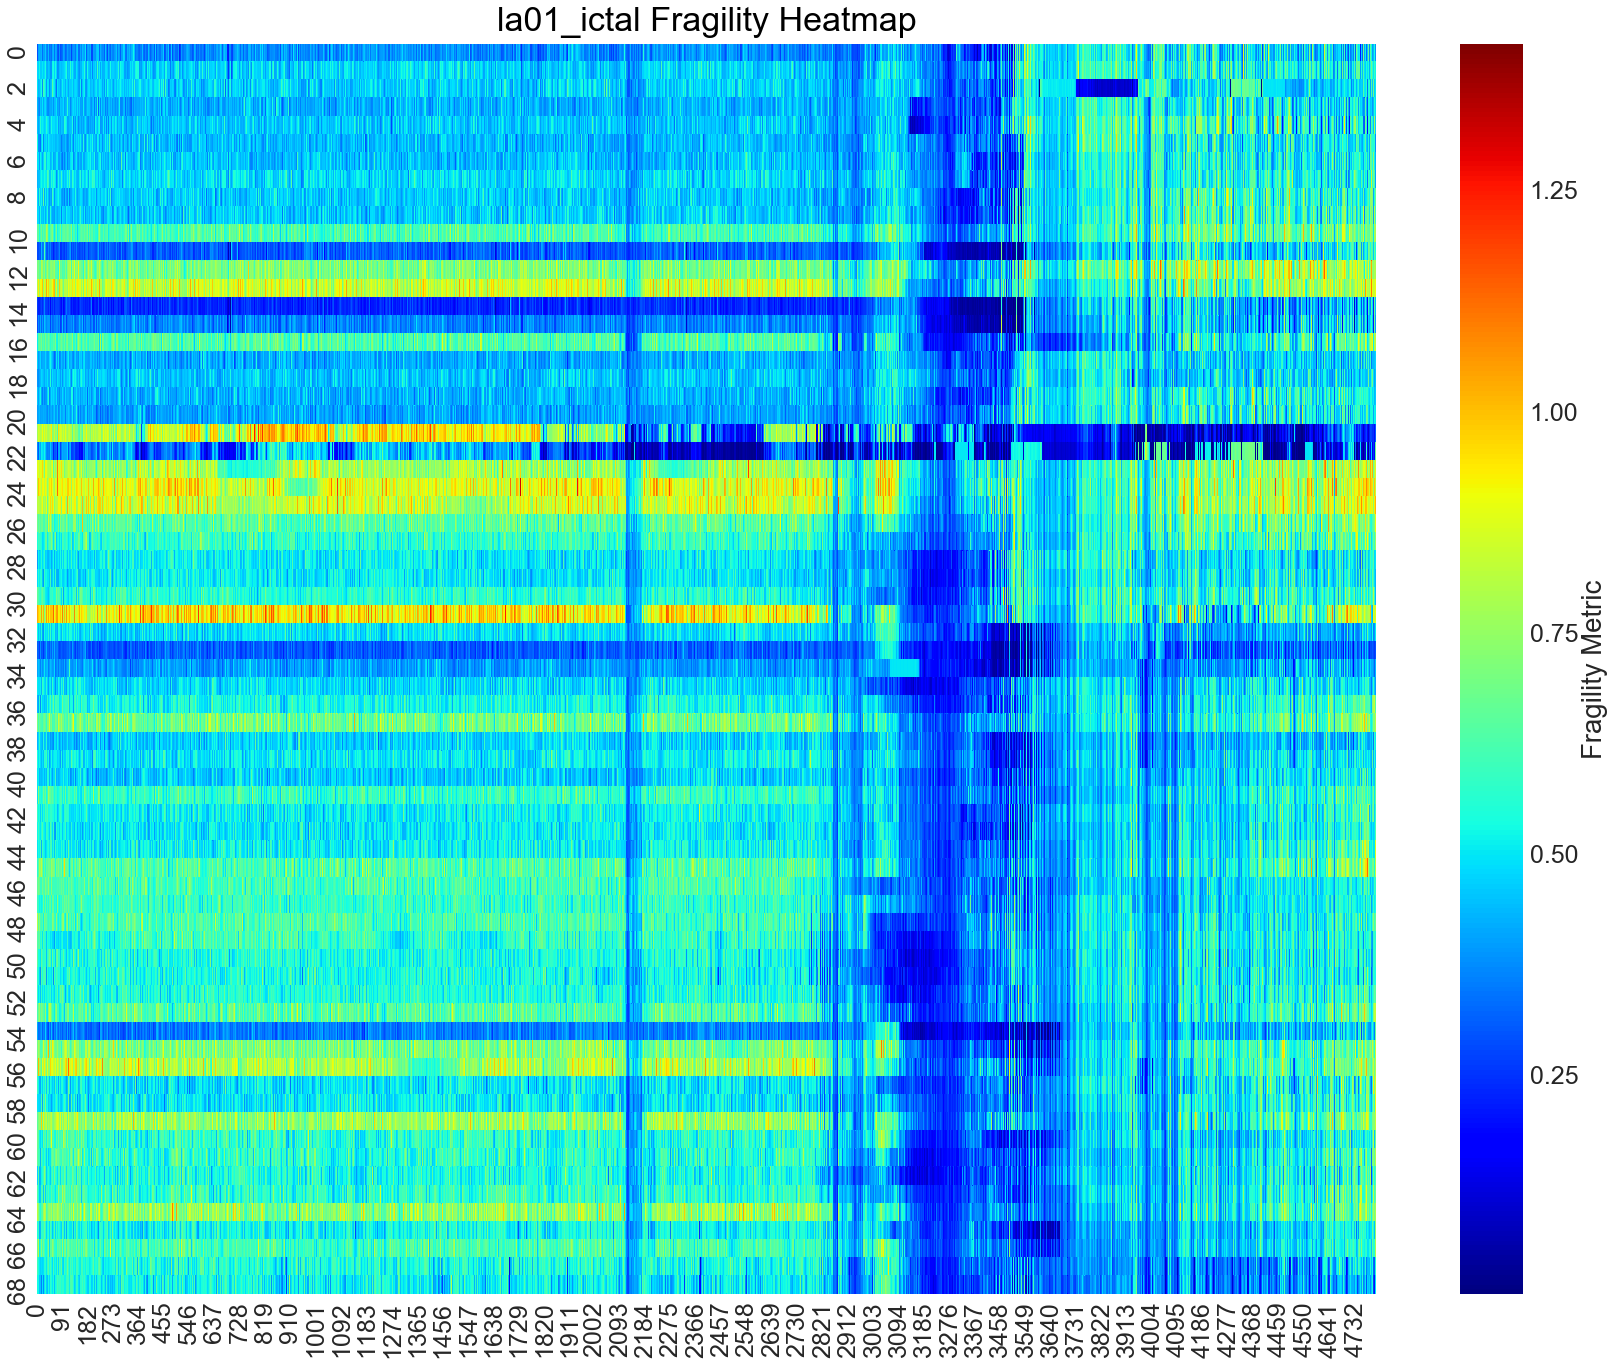

In [7]:
 ### Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'34', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'30'}

# Begin Plotting
sns.set(font_scale=2.5)
fig, ax = plt.subplots(figsize=(30,23))
sns.heatmap(ax=ax, data=pertmats, cmap=plt.cm.jet, cbar=True, 
                 cbar_kws={'label': 'Fragility Metric'})
ax.set_title(patient + ' Fragility Heatmap', **title_font)


Inference for Stan model: anon_model_cbe9cd2f1e5ab5d1c7cce1f23ca970b4.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         8.16    0.13   4.78  -0.71   4.96   8.01   11.1  18.29 1294.0    1.0
tau        6.62    0.17   5.28   0.26   2.53   5.45   9.33  20.18  926.0    1.0
eta[0]     0.38    0.02   0.92  -1.49  -0.22    0.4   1.02   2.12 2000.0    1.0
eta[1]     0.01    0.02   0.87  -1.73  -0.54 7.7e-3   0.58   1.73 2000.0    1.0
eta[2]    -0.17    0.02   0.95  -2.08  -0.79  -0.17   0.49   1.67 2000.0    1.0
eta[3]    -0.04    0.02   0.86  -1.69  -0.61  -0.05   0.53   1.65 2000.0    1.0
eta[4]    -0.38    0.02   0.88  -2.02  -0.96  -0.42   0.16   1.45 2000.0    1.0
eta[5]    -0.25    0.02   0.89  -2.02  -0.81  -0.25   0.33   1.51 2000.0    1.0
eta[6]     0.33    0.02   0.87  -1.46  -0.24   0.35   0.91   2.08 2000.0    1.0
eta[7]     0.

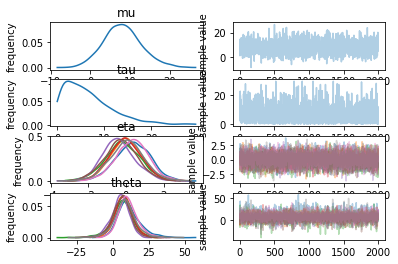

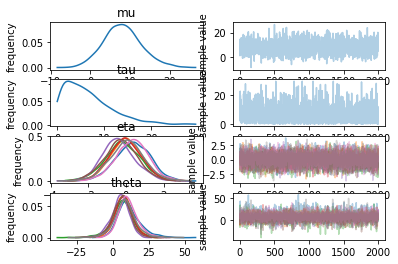

In [12]:
perturbation_code = """
data {
    int<lower=0> N; // number of contacts
    int<lower=0> T; // number of time windows
    real matrix pert[N, T];
}
parameters {
    real<lower=0, upper=1> p[N]; // parameters of probability in EZ
}
model {
    p ~ normal(0.5, 1);       // prior on parameter EZ probabilities
    pert ~ normal(0.25, 0.5); // prior on observations perturbation distribution
    
    for (chan in 1:N) {
        fragility[chan] ~ model(p, std)
    }
}
"""

# schools_dat = {'J': 8,
#                'y': [28,  8, -3,  7, -1,  1, 18, 12],
#                'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

# sm = pystan.StanModel(model_code=schools_code)
# fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

print fit
fit.plot()

In [13]:
la = fit.extract(permuted=True)  # return a dictionary of arrays
mu = la['mu']

## return an array of three dimensions: iterations, chains, parameters
a = fit.extract(permuted=False)